In [1]:
import sys, os
import scanpy as sc

In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
#check if the variable names are unique
adata.var.index.is_unique

True

... storing 'feature_types' as categorical
... storing 'genome' as categorical


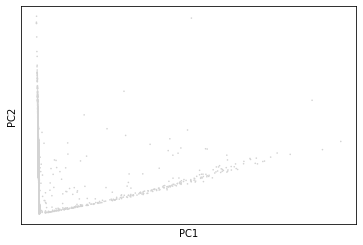

In [4]:
#before filter
pre_filter_data = adata
sc.tl.pca(pre_filter_data)
sc.pl.pca(pre_filter_data)

In [5]:
#Filter the data as done by Zhang et. al
sc.pp.recipe_zheng17(adata)

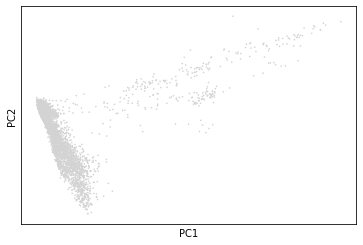

In [6]:
#plot pca after filter
sc.tl.pca(adata)
sc.pl.pca(adata)

In [7]:
#run neighbors
sc.pp.neighbors(adata)

In [8]:
#run leiden
sc.tl.leiden(adata)

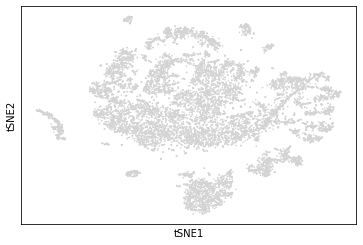

In [9]:
#run tSNE
sc.tl.tsne(adata)
sc.pl.tsne(adata)

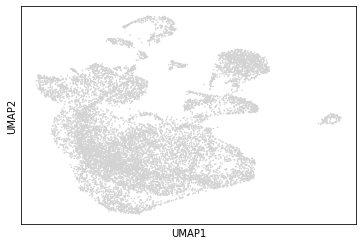

In [10]:
#run UMAP
sc.tl.umap(adata)
sc.pl.umap(adata)

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


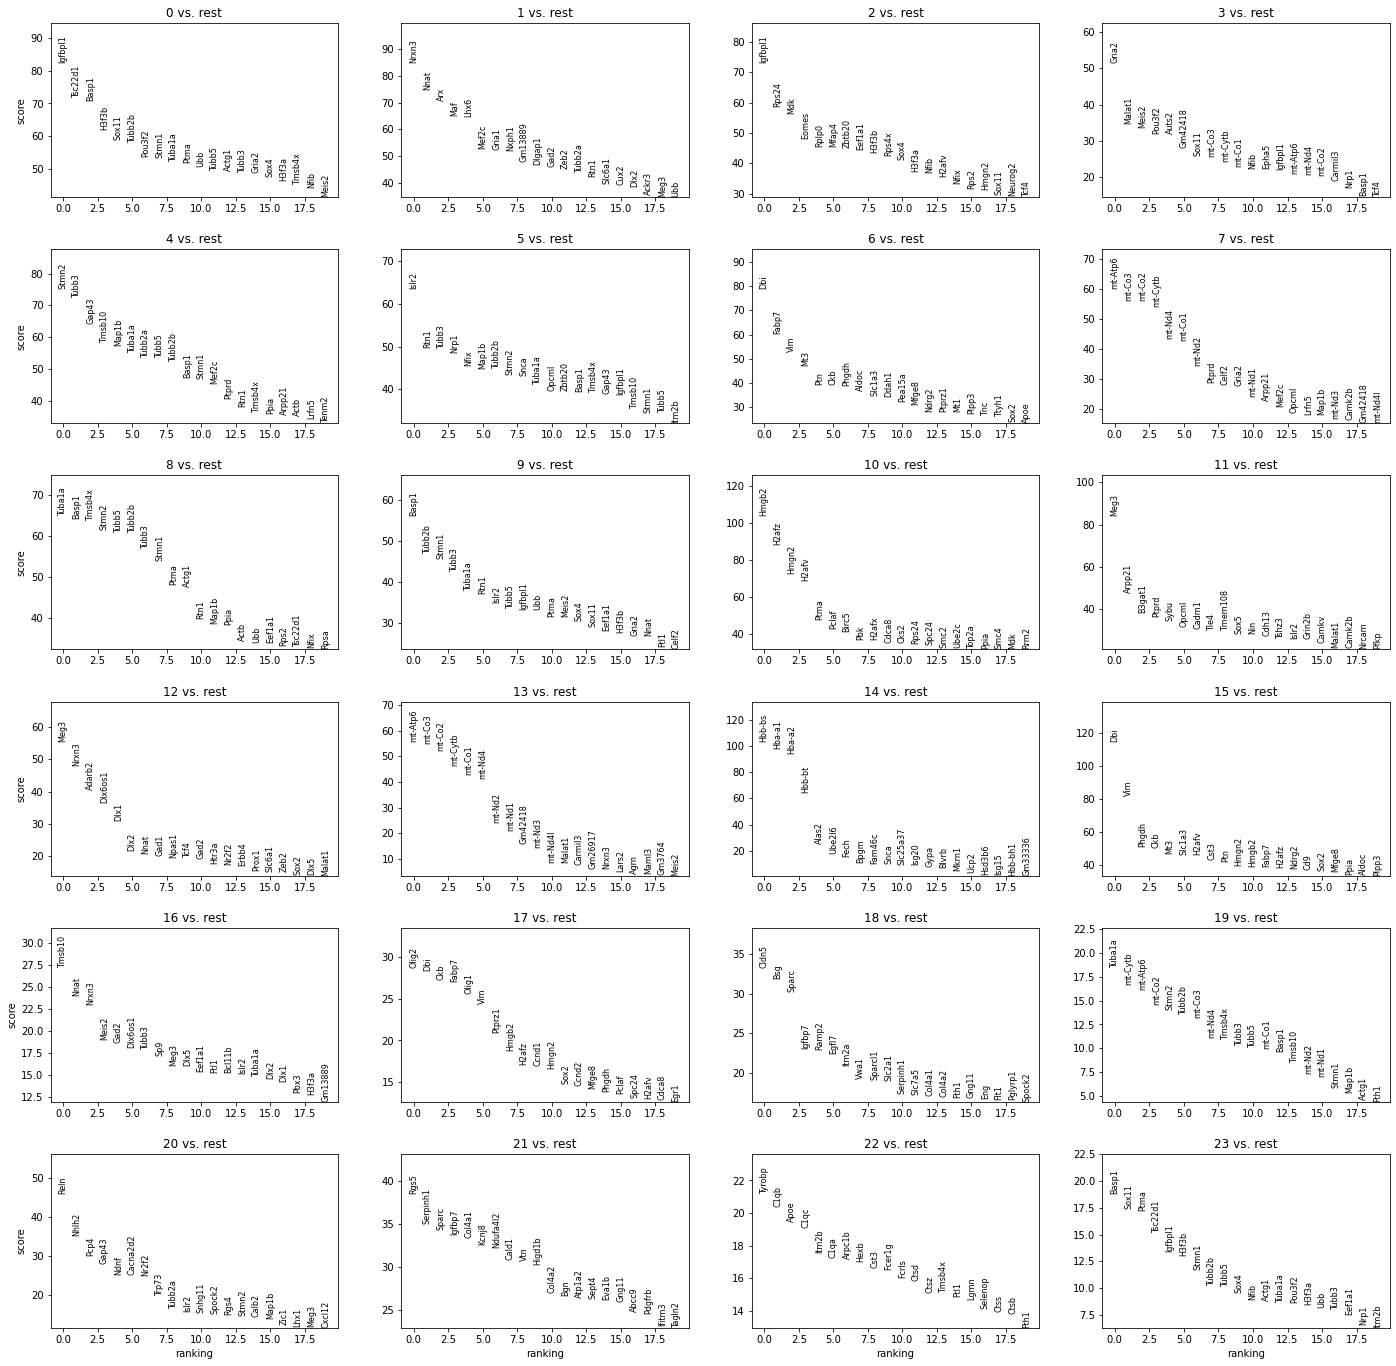

In [20]:
#plot t-test
t_test = sc.tl.rank_genes_groups(adata, 'leiden', copy = True, method = 't-test')
sc.pl.rank_genes_groups(t_test, sharey = False)

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


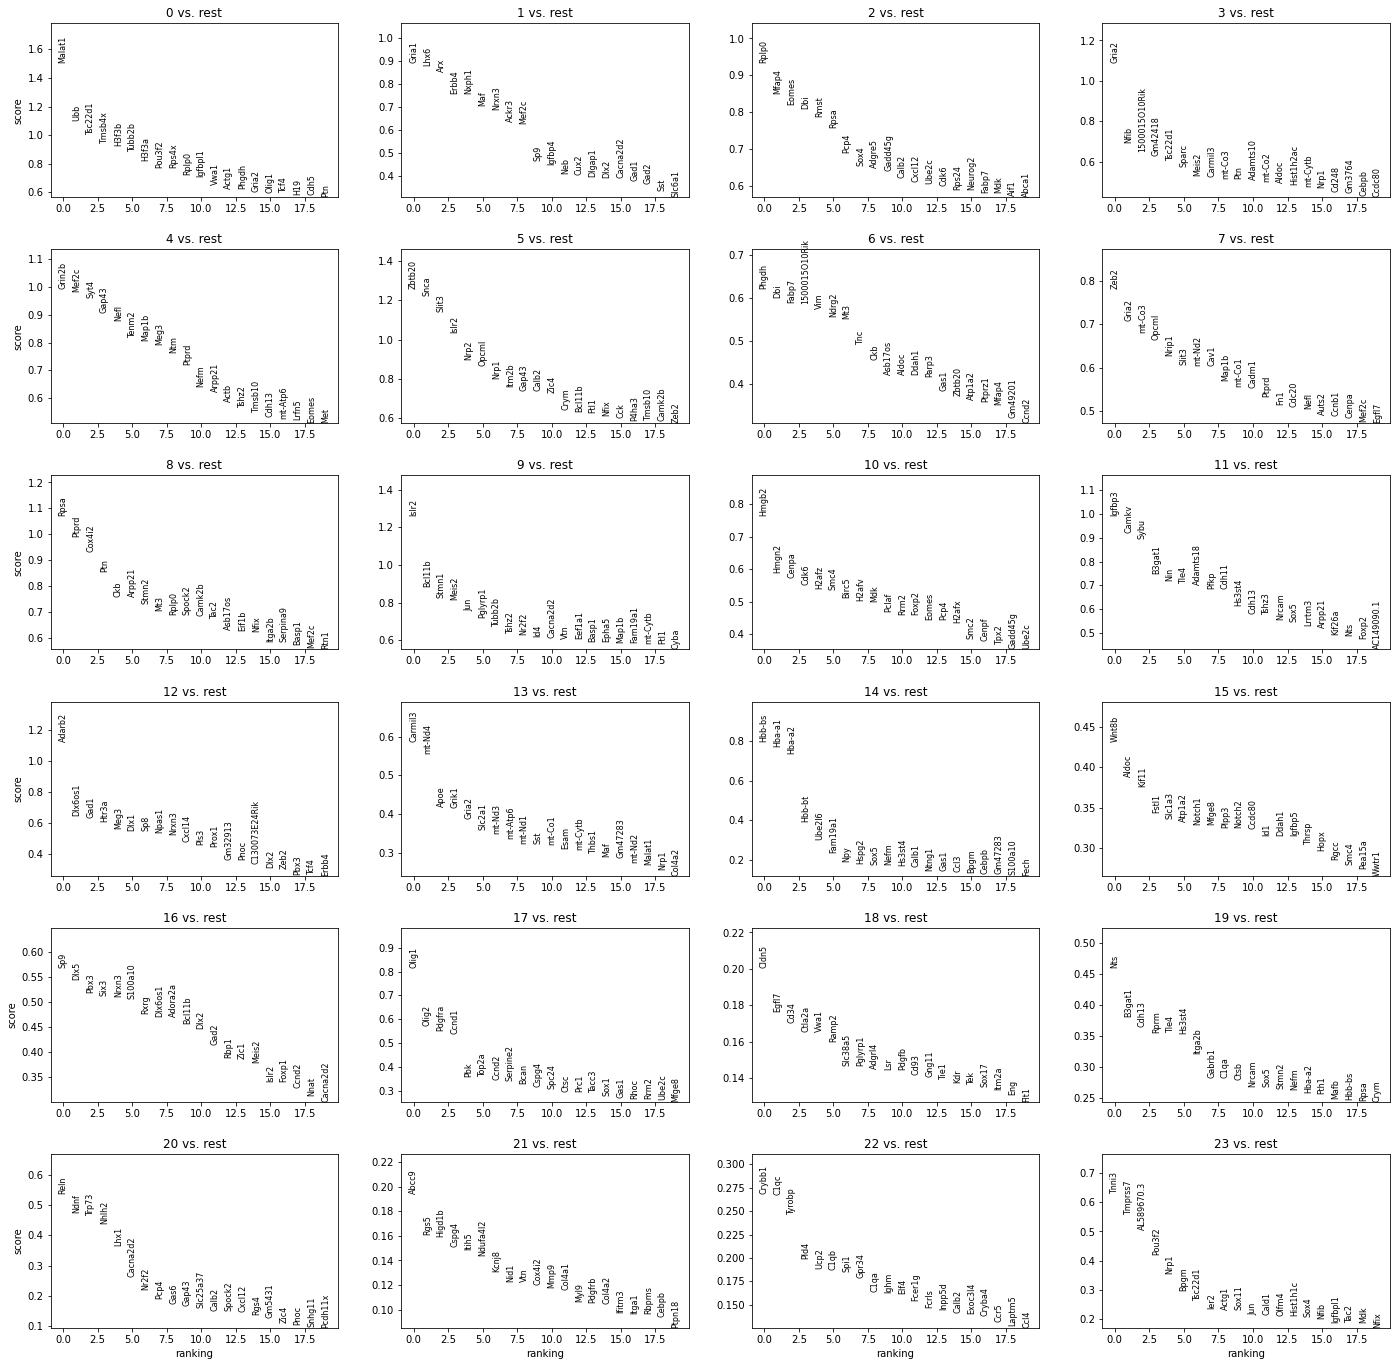

In [17]:
#plot logistic regression
log_reg = sc.tl.rank_genes_groups(adata, 'leiden', copy = True, method = 'logreg')
sc.pl.rank_genes_groups(log_reg, sharey = False)

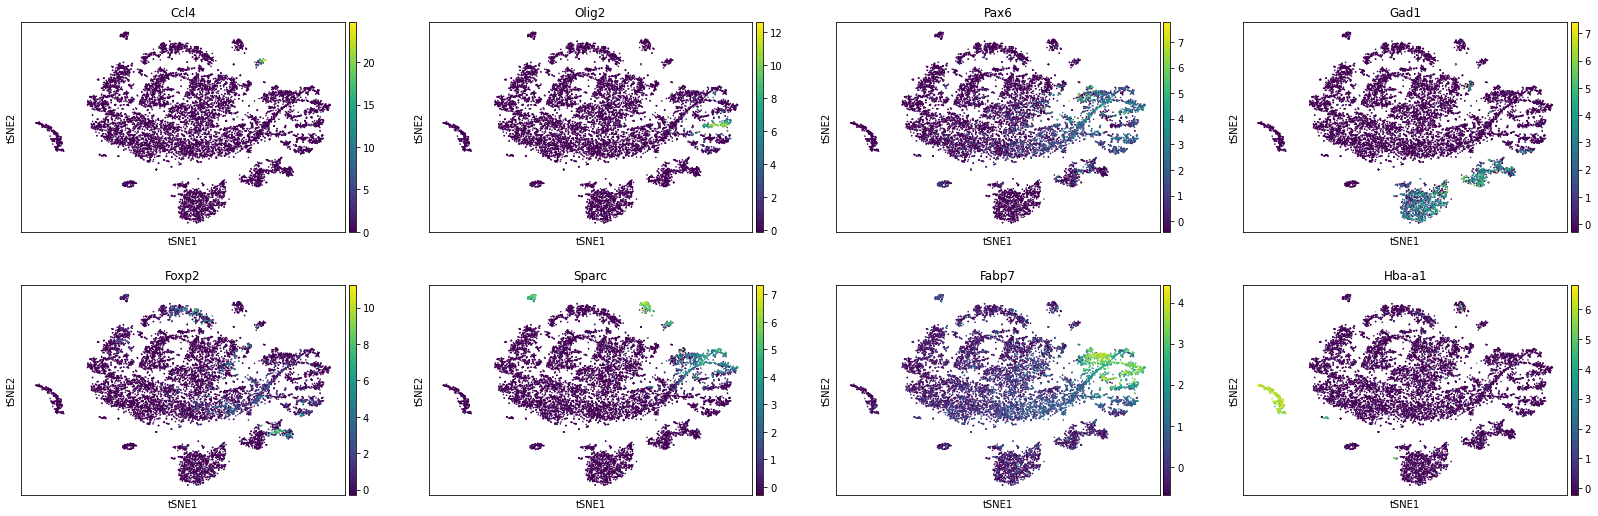

In [76]:
sc.pl.tsne(adata, color = ["Ccl4", "Olig2", "Pax6", "Gad1", "Foxp2", "Sparc", "Fabp7", "Hba-a1"])

In [22]:
Ccl4 = microglia
Olig2 = oligodendrocytes
Pax6 = radial glia
Gad1 = GABAergic neuron
Foxp2 = CT neuron
Sparc = glial cell
Fabp7 = neuroepithelial cell
Hba-a1 = mesencephalic dopaminergic neuron

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'pca', 'log1p', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [84]:
#cell cluster
sc.tl.leiden(adata, key_added = "cluster")

#cell type dictionary
cell_type_dic = {'0':'0', '1':'1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'radial glia', '7':'7', '8':'GABAergic neuron', '9':'9',
                '10':'10', '11':'11', '12':'12', '13':'13', '14':'mesencephalic dopaminergic neuron', '15':'neuroepithelial cell', '16':'CT neuron', '17':'oligodendrocytes',
                 '18':'glial cell', '19':'19', '20':'20', '21':'21', '22':'microglia', '23':'23'}
adata.obs['cell type'] = adata.obs['cluster'].map(cell_type_dic).astype("category")

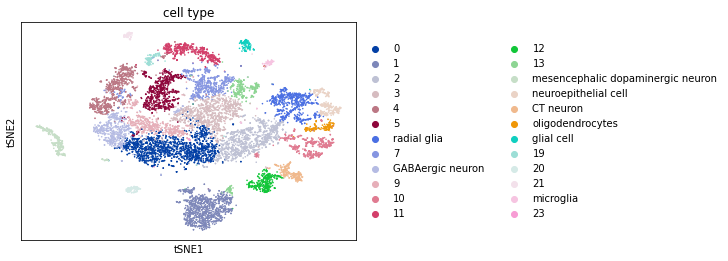

In [85]:
sc.pl.tsne(adata, color = "cell type")